<h1>MNIST DATASET </h1>

# Import Libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

import os
import cv2
import numpy as np
import tensorflow as tf

from sklearn.model_selection import train_test_split

from tensorflow.keras.utils import to_categorical

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from keras.optimizers import SGD
import datetime

import warnings                      
warnings.simplefilter("ignore")  # ignores the warning

# Load .npy file

In [2]:
# Load the MNIST data from .npy file
data = np.load('data/mnist_data.npy', allow_pickle=True)
images = data.item().get('images')
labels = data.item().get('labels')

# Visualize

In [3]:
import random

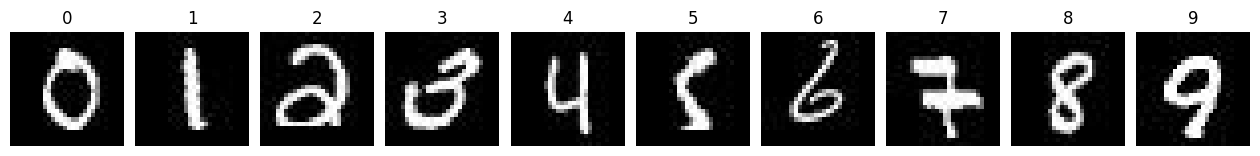

In [4]:
def random_value_for_index(labels, target_value):
    indices = [index for index, value in enumerate(labels) if value == target_value]
    return random.choice(indices)

# Define categories
categories = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]

# Create subplots
fig, axs = plt.subplots(1, 10, figsize=(16, 16))

for index, category in enumerate(categories):
    # Select random image index from specific category
    random_index = random_value_for_index(labels, category)
    # Plot the random image
    axs[index].imshow(images[random_index].reshape(28, 28), cmap='gray')
    axs[index].axis('off')
    axs[index].set_title(category)

plt.subplots_adjust(wspace=0.1, hspace=0.1)
plt.show()

# Train Test Split

In [5]:
x_train,x_test,y_train,y_test = train_test_split(images, labels, test_size=0.2, random_state=11)

In [6]:
print("X_train shape : ",x_train.shape)
print("y_train shape : ",y_train.shape)
print("X_test shape : ",x_test.shape)
print("y_test shape : ",y_test.shape)


X_train shape :  (33600, 784)
y_train shape :  (33600,)
X_test shape :  (8400, 784)
y_test shape :  (8400,)


In [7]:
x_train[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   2,   8,   0,   6,   0,
         0,   0,   0,   0,   2,   0,   0,   9,   0,  10,   0,   0,  21,
         0,   2,   0,   0,   0,   0,   0,   0,   0,   0,   0,   7,   3,
         7,   4,   6,   2,   1,   3,   2,   0,   2,  15,   0,   5,   0,
         0,   6,   0,   4,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   4,   0,   0,   0,   0,   9,   0,   3,   3,   0,   3,   0,
        10,   4,  10,   0,   0,   6,   0,   0,   0,   0,   0,   0,   0,
         0,   8,   0,   2,   0,   3,   0,   0,   7,   0,   1,   1,   0,
         0,   0,   3,   0,   0,   3,   5,   1,   0,   0,   0,   0,   0,
         0,   0,   0,   5,   0,   3,   1,   0,  11,   5,   0,   4,   0,
         0,   6,   0,   0,   0,  10,   2,   0,  11,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,  13,   0,   2,  18,   0,
         4,   0,   2,   9,   0,   0,  47, 136, 149,   1,   0,   2,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,  13, 106,  2

# Normalization

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

# Train ANN model

In [9]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               100480    
                                                                 
 dense_1 (Dense)             (None, 128)               16512     
                                                                 
 dense_2 (Dense)             (None, 10)                1290      
                                                                 
Total params: 118282 (462.04 KB)
Trainable params: 118282 (462.04 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# Early Stoping

In [11]:
from tensorflow.keras.callbacks import EarlyStopping
early_stop=EarlyStopping(monitor='val_loss',patience=4)

# Compile

In [12]:
optimizer = tf.keras.optimizers.SGD(learning_rate=0.001)
model.compile(optimizer=optimizer, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


# Tensorboard

In [13]:
# log_dir = "logs/mnist_ann/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
log_dir = "logs/mnist_ann/"
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1)
optimizer = tf.keras.optimizers.Adam()
optimizer = tf.keras.optimizers.Adam()

# Train

In [14]:
history = model.fit(x_train, y_train, epochs=10, batch_size=2, validation_split=0.1,callbacks=[early_stop, tensorboard_callback])

Epoch 1/10
15120/15120 [==============================] - 15s 1000us/step - loss: 2.1539 - accuracy: 0.4899 - val_loss: 1.8711 - val_accuracy: 0.6473
Epoch 2/10
15120/15120 [==============================] - 15s 980us/step - loss: 1.3903 - accuracy: 0.6921 - val_loss: 0.9885 - val_accuracy: 0.7655
Epoch 3/10
15120/15120 [==============================] - 14s 940us/step - loss: 0.7750 - accuracy: 0.8089 - val_loss: 0.6320 - val_accuracy: 0.8357
Epoch 4/10
15120/15120 [==============================] - 14s 934us/step - loss: 0.5528 - accuracy: 0.8513 - val_loss: 0.4938 - val_accuracy: 0.8649
Epoch 5/10
15120/15120 [==============================] - 14s 938us/step - loss: 0.4580 - accuracy: 0.8730 - val_loss: 0.4277 - val_accuracy: 0.8810
Epoch 6/10
15120/15120 [==============================] - 15s 967us/step - loss: 0.4060 - accuracy: 0.8864 - val_loss: 0.3961 - val_accuracy: 0.8860
Epoch 7/10
15120/15120 [==============================] - 15s 967us/step - loss: 0.3742 - accuracy: 0.894

# Metrics

In [15]:
metrics=pd.DataFrame(model.history.history)

<Axes: >

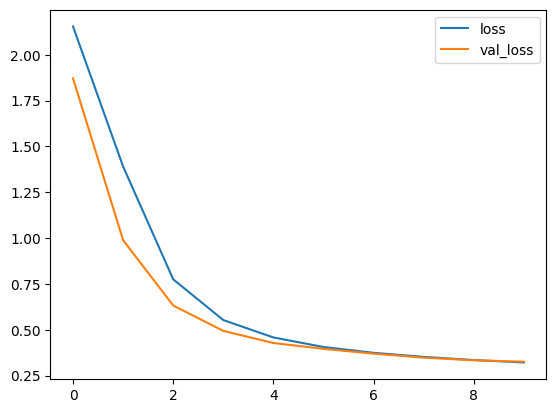

In [16]:
metrics[['loss','val_loss']].plot()

<Axes: >

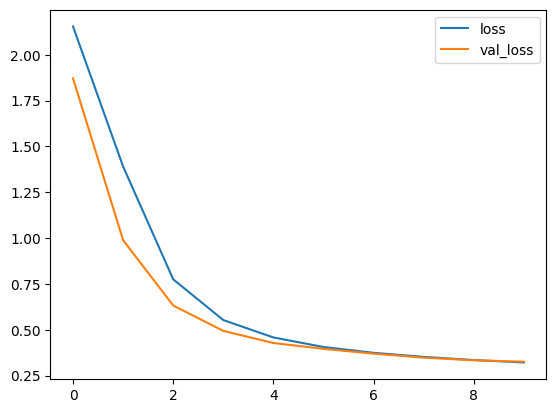

In [17]:
metrics[['loss','val_loss']].plot()


<Axes: >

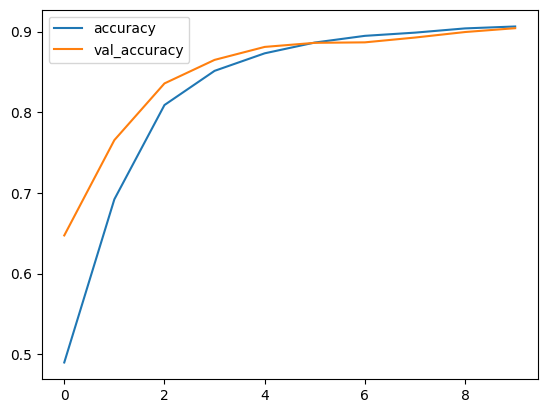

In [18]:
metrics[['accuracy', 'val_accuracy']].plot()

<Axes: >

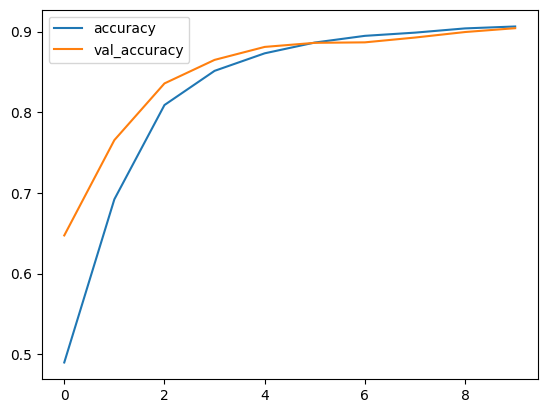

In [19]:
metrics[['accuracy', 'val_accuracy']].plot()


In [20]:
model.save("model/mnist_ann.h5")

In [21]:
from keras.models import load_model
model= load_model("model/mnist_ann.h5")

# Predict on Test data

In [22]:
y_pred = model.predict(x_test)

263/263 [==============================] - 0s 622us/step


In [23]:
y_pred

array([[4.29175742e-07, 8.60687315e-01, 1.16857318e-02, ...,
        1.40802190e-03, 1.13927595e-01, 1.31291582e-03],
       [8.41785277e-06, 1.30282297e-05, 2.98987632e-03, ...,
        1.46606535e-01, 1.51658477e-03, 8.13987315e-01],
       [3.25031258e-04, 6.25850635e-06, 1.58521533e-02, ...,
        8.68379402e-07, 4.44278179e-04, 9.32690909e-06],
       ...,
       [8.96488483e-09, 9.94344115e-01, 7.65951525e-04, ...,
        1.08306995e-03, 5.95100282e-04, 1.83922602e-04],
       [3.36573157e-03, 5.78204663e-06, 3.89252782e-05, ...,
        1.59891159e-03, 2.45934874e-02, 1.65959984e-01],
       [9.98528361e-01, 1.82168669e-09, 2.44268420e-04, ...,
        1.47753308e-04, 3.21298758e-05, 1.86999841e-05]], dtype=float32)

In [24]:
y_pred = np.argmax(y_pred, axis=1)

In [25]:
y_pred

array([1, 9, 6, ..., 1, 5, 0], dtype=int64)

<h2>Model Evaluation</h2>

In [26]:
from sklearn.metrics import accuracy_score,recall_score, precision_score, f1_score,classification_report

In [27]:
print("Model's acuracy :",accuracy_score(y_pred,y_test))
print("Recall-Score :",recall_score(y_pred,y_test,average="macro"))
print("Precision-Score :",precision_score(y_pred,y_test,average="macro"))
print("F1-Score :",f1_score(y_pred,y_test,average="macro"))

Model's acuracy : 0.9058333333333334
Recall-Score : 0.9050117620683341
Precision-Score : 0.9037099847351652
F1-Score : 0.903820005604269


In [28]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.97      0.94      0.96       884
           1       0.97      0.95      0.96       945
           2       0.89      0.87      0.88       866
           3       0.89      0.89      0.89       876
           4       0.92      0.88      0.90       862
           5       0.80      0.92      0.86       673
           6       0.94      0.91      0.93       831
           7       0.93      0.92      0.93       917
           8       0.87      0.87      0.87       778
           9       0.85      0.89      0.87       768

    accuracy                           0.91      8400
   macro avg       0.90      0.91      0.90      8400
weighted avg       0.91      0.91      0.91      8400



# Confusion Matrix

In [29]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

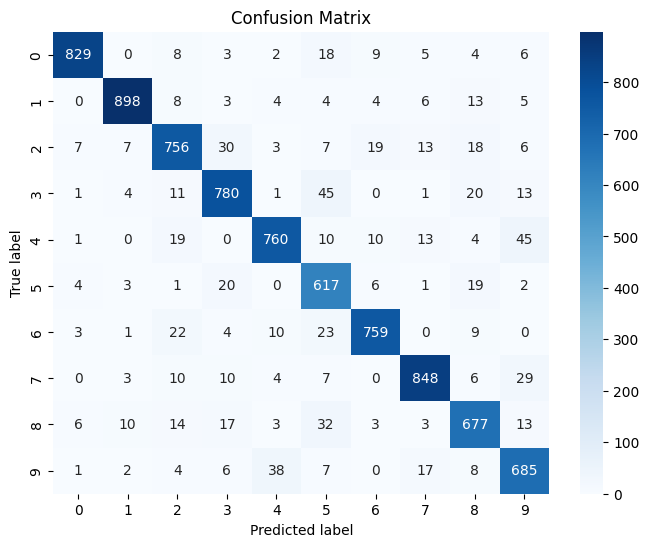

In [30]:
# Compute confusion matrix
cm = confusion_matrix(y_pred , y_test)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=categories, yticklabels=categories)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')
plt.show()

# Predict

In [31]:
def classify_image(image):
    plt.imshow(cv2.resize(image,(28,28)),cmap='gray')
    image = image.reshape(1, -1)
    # Perform prediction
    prediction = np.argmax(model.predict(image))
    
    return prediction

1/1 [==============================] - 0s 14ms/step


1

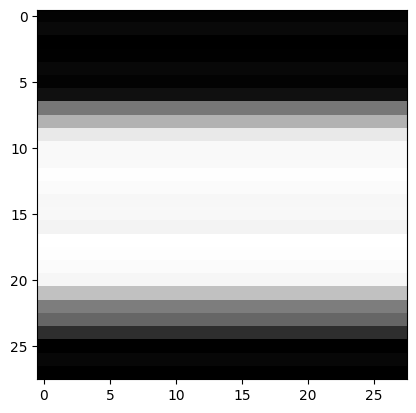

In [32]:
classify_image(x_test[0])

# Custom

In [33]:
def classify_image_custom(image):
    image = cv2.resize(image, (28, 28))
    
    plt.imshow(image,cmap='gray')
    image = tf.keras.utils.normalize(image, axis=1)

    image = image.flatten()
    print(image)
    image = np.expand_dims(image, axis=0)
    print(image)
    print(image.shape)
    # Perform prediction
    prediction = np.argmax(model.predict(image))
    
    return prediction

[0.         0.         0.         0.         0.         0.
 0.         0.         0.43905704 0.         0.         0.
 0.32929278 0.         0.         0.21952852 0.         0.
 0.         0.5488213  0.21952852 0.         0.         0.5488213
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.45807867 0.687118   0.22903933 0.
 0.         0.28629917 0.05725983 0.         0.11451967 0.28629917
 0.28629917 0.05725983 0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.52915026 0.
 0.         0.37796447 0.         0.         0.15118579 0.
 0.52915026 0.30237158 0.         0.         0.         0.30237158
 0.30237158 0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.8131434  0.         0.         0.
 0.         0.29568851 0.44353276

0

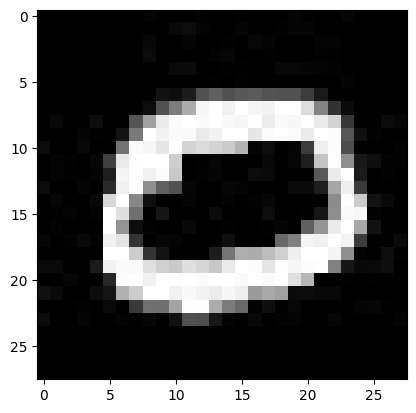

In [34]:
img = cv2.imread('data/test/img_2.jpg', cv2.IMREAD_GRAYSCALE)
classify_image_custom(img)

In [35]:
from tensorflow.keras.models import Model


In [36]:
def get_activations(model, layer_name, X):
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(X, verbose=False)
    print(activations)
    return activations


# Visualize

In [37]:
from tensorflow.keras.models import Model

In [38]:
def preprocess_img(image):
    image = cv2.resize(image, (28, 28))
    
    plt.imshow(image,cmap='gray')
    image = tf.keras.utils.normalize(image, axis=1)
    image = image.flatten()
    
    image = np.expand_dims(image, axis=0)
    
    
    return image

In [39]:
def get_activations(model, layer_name, X):
    layer = model.get_layer(name=layer_name)
    activation_model = Model(inputs=model.input, outputs=layer.output)
    activations = activation_model.predict(X, verbose=False)
    print(activations)
    return activations


In [40]:
def plot_activations(layer_name, activations):
    print(f"Layer: {layer_name}")
    print(f"Activation Shape: {activations.shape}")

    if len(activations.shape) == 2:
        # 2D activations (Dense layers)
        plt.figure(figsize=(10, 5))
        plt.bar(range(activations.shape[1]), activations[0], color='skyblue')
        plt.title(f'Activations of {layer_name}')
        plt.xlabel('Neurons')
        plt.ylabel('Activation')
        plt.grid(True)
        plt.show()
    
    elif len(activations.shape) == 3:
        # 3D activations (Convolutional layers)
        num_channels = activations.shape[-1]
        for i in range(num_channels):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, :, :, i], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Channel {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    elif len(activations.shape) == 4:
        # 4D activations (Batches of 3D data, e.g., convolutional layers)
        num_samples = activations.shape[1]
        for i in range(num_samples):
            plt.figure(figsize=(10, 5))
            plt.imshow(activations[0, i, :, :], aspect='auto', cmap='viridis')
            plt.colorbar()
            plt.title(f'Activations of {layer_name} - Sample {i}')
            plt.xlabel('Width')
            plt.ylabel('Height')
            plt.show()

    else:
        print(f"Activation shape {activations.shape} not supported for visualization")

[[0.60007983 0.         0.6097424  0.4667611  0.         0.53020144
  0.8437585  0.44613588 0.24643373 0.         1.2742581  0.
  0.         0.         0.6453745  0.63885295 0.33196148 0.
  0.9475708  1.0080253  1.6915555  0.         0.         1.2643476
  0.11901523 1.2612809  0.         0.         0.         0.5403932
  1.1311435  1.1593385  0.42626417 0.         0.         0.27774683
  0.         0.19125642 1.1330794  0.1397369  0.17582613 0.83865464
  0.14487727 1.3057722  0.         0.08418853 0.23089142 0.9303473
  0.9064437  0.43832818 0.2654722  0.00495619 0.56834674 0.
  1.4804019  0.         1.662412   0.433156   0.2806705  0.
  1.1379606  0.36824602 1.7018263  0.         0.2836027  1.5292245
  0.         0.         1.6230415  0.         1.300852   0.35864964
  0.03247913 0.34296182 0.         0.87286955 1.0307194  0.962661
  0.         0.         0.3242981  0.09731005 0.         0.73632866
  0.05292606 0.         0.23154968 0.         0.11583717 0.
  1.3105441  0.73315126 0.

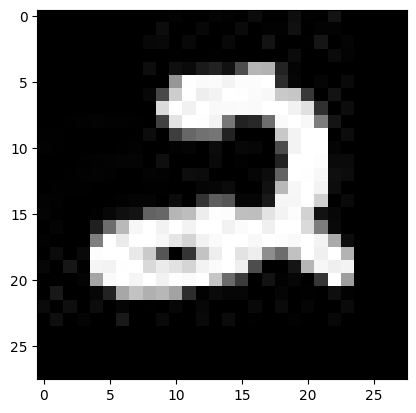

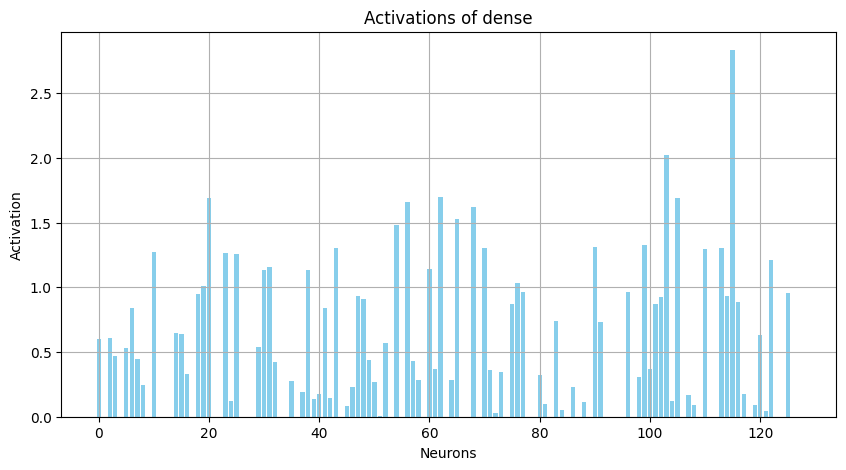

[[0.82805157 2.181296   1.1805145  1.7257538  0.18027282 0.
  0.         0.590899   2.106914   0.2756389  0.         3.8514903
  2.3634439  0.         0.         3.391804   0.         0.
  1.5861742  1.703857   1.0293239  4.7286143  0.         2.8316061
  0.         0.4605811  2.0706096  0.22841899 0.         0.
  0.94279355 0.15466441 2.9483047  0.         0.         0.50442535
  3.2695537  1.032854   1.5696459  3.0704827  0.         2.852676
  0.         0.87872356 0.6831933  0.         2.6065993  3.2136774
  3.1870472  0.         1.8379333  3.1481936  0.         0.
  5.213861   0.         2.7637427  0.         0.         0.
  0.         2.3746192  3.9494977  0.20042707 3.8578308  0.
  2.2499962  0.         2.1442487  0.         0.7805176  0.
  0.         0.09810835 0.         1.6019971  3.1491163  0.77511764
  3.400224   1.2042468  1.7790809  1.2791548  0.         0.
  1.6770413  0.         2.825212   0.         0.4617064  4.9018507
  4.621104   1.9063556  0.         0.         2.08

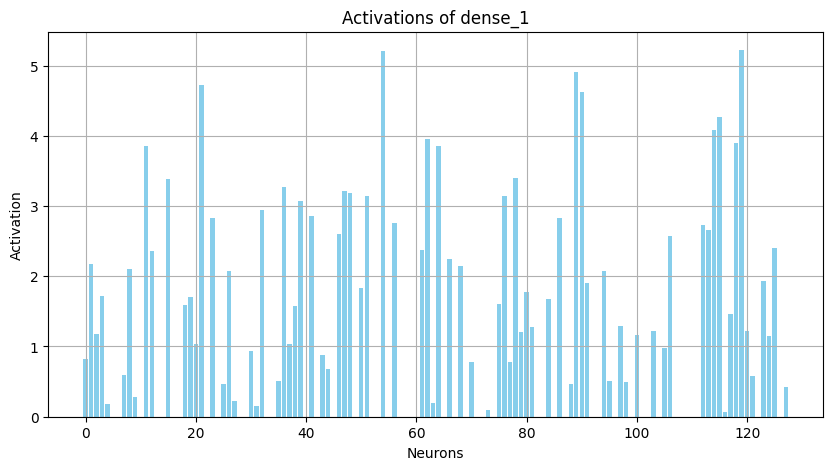

[[1.70118355e-08 1.23794774e-23 1.00000000e+00 2.19840743e-11
  1.94931932e-23 5.08108513e-18 9.20458875e-18 1.21010502e-17
  7.82317144e-09 1.34342046e-16]]
Layer: dense_2
Activation Shape: (1, 10)


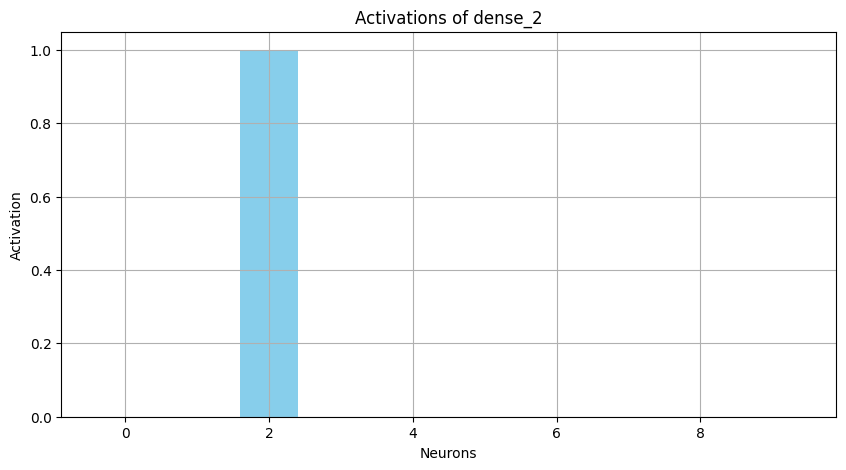

In [41]:
layer_names = [layer.name for layer in model.layers]

X_sample = cv2.imread("data/test/img_1.jpg", cv2.IMREAD_GRAYSCALE)
X_sample = preprocess_img(X_sample)
# X_sample = np.expand_dims(X_sample, axis=0)  

for layer_name in layer_names:
    activations = get_activations(model, layer_name, X_sample)
    plot_activations(layer_name, activations)